# 기말고사
## Prob. 2

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

$
d\omega = 0.1
$

$
\phi = 0.01
$

$
\Omega \times V_{0} = 1
$

$
T = 100000
$

$
\Delta t = 0.001
$

$
U(t=0) = 
\begin{pmatrix}
1 & 0 \\
0 & 1 \\
\end{pmatrix}
$

In [2]:
# variables, constants
dw = 0
phi = 0
om_v0 = 1
dt = 0.001

u0 = torch.tensor([[1, 0], [0, 1]]) * (1. + 0j)

# input layer
input_size = 100
layer_overlaps = 3

# loss
loss_list = []
epoch_range = 1000+1

$
H(t) = -\frac{1}{2} \Omega V_{0} s(t) 
\begin{pmatrix}
0                        & e^{i(\text{d} \omega t + \phi)} \\
e^{-i(\text{d} \omega t + \phi)} & 0                       \\
\end{pmatrix}
$

In [3]:
def H(s_t, T):
    t = T*dt
    y = -0.5 * om_v0 * s_t * torch.tensor([[0, torch.exp(torch.tensor(+1j * (dw*t + phi)))], 
                                           [torch.exp(torch.tensor(-1j * (dw*t + phi))), 0]])
    return y

In [4]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        layers = []
        in_features = input_size * 8
        out_features = input_size * 16

        for _ in range(layer_overlaps):
            layers.append(nn.Linear(in_features, out_features))
            layers.append(nn.ReLU())
            in_features = out_features
            out_features //= 2  # 출력 차원 줄이는 정도 (=나누기 2)

        layers.append(nn.Linear(in_features, input_size*1))  # last layer

        self.fcn = nn.Sequential(*layers)  # Fully Connected Network

    def forward(self, x):
        y = self.fcn(x)
        return y

In [242]:
# input_size = 100  # a
# class NeuralNet(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fcn = nn.Sequential(nn.Linear(a*8, a*16),
#                                  nn.ReLU(),
#                                  nn.Linear(a*16, a*16),
#                                  nn.ReLU(),
#                                  nn.Linear(a*16, a*8))
#                                 #  nn.ReLU())  # ReLU가 무엇이지??
    
#     def forward(self, x):
#         y = self.fcn(x)
#         return y

$
P = \big|
\begin{pmatrix}
0 & 1 \\
\end{pmatrix}
U(t)
\begin{pmatrix}
1 \\
0 \\
\end{pmatrix}
\big| ^2
$

tensor(5.9982, grad_fn=<NegBackward0>)


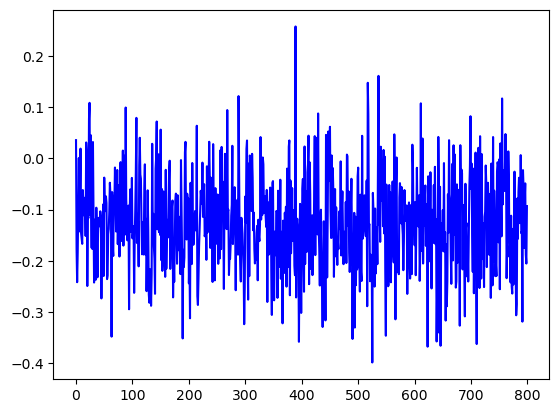

tensor(5.7033, grad_fn=<NegBackward0>)


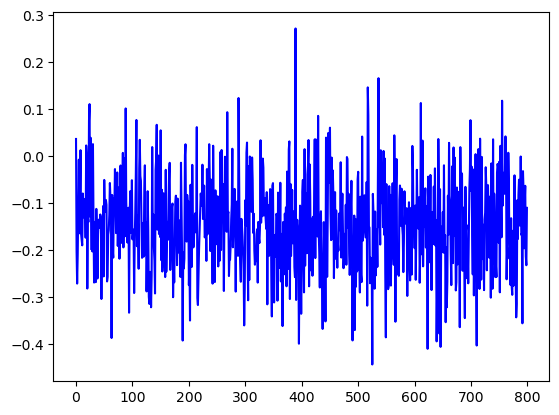

tensor(5.4388, grad_fn=<NegBackward0>)


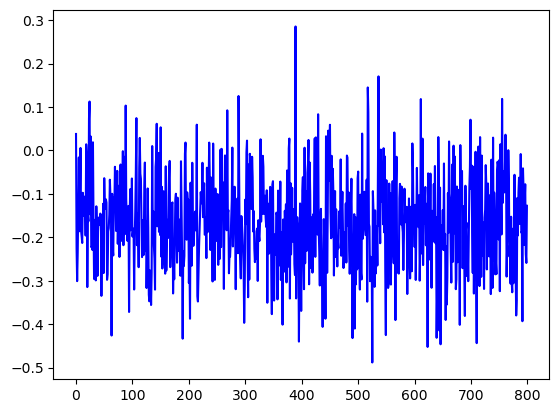

KeyboardInterrupt: 

In [246]:
model = NeuralNet()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)  # lr = learning rate

for epoch in range(epoch_range):
    input_t = torch.arange(input_size*8)*dt
    st = model(input_t)
    model.train()

    ut = u0.detach().clone()

    for T in range(input_size*8):
        dudt = -1j*torch.matmul(H(st[T], T), ut)
        ut += dudt*dt
    
    p = torch.square(torch.matmul(torch.matmul(torch.tensor([[0, 1]]) * (1. + 0j), ut), torch.tensor([[1], [0]])*(1. + 0j)).abs())[0]
    p_scalar = p.sum()
    loss = -torch.log(p_scalar).requires_grad_(True)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 1:
        print(loss)
        print(ut)
        plt.plot(st.detach().numpy(), 'b')
        plt.show()
        loss_list.append(loss.item())

plt.plot(loss_list, 'b.')
plt.show()